Documentation Outline
Each section of your workflow can be explained and documented as follows:

1. Introduction
Objective: Explain what the analysis aims to achieve (e.g., predict air quality metrics, visualize data trends, etc.).
Dataset: Describe the dataset briefly, mentioning key features, the source, and its purpose.
2. Data Cleaning and Preparation
Include clear comments and markdown cells explaining why each cleaning step is necessary:
Dropping empty columns/rows.
Handling missing values.
Normalizing or scaling data.
3. Exploratory Data Analysis (EDA)
Document each visualization:
State what insights you’re looking for (e.g., distribution of pollutants, correlation between variables).
Explain the choice of plots (scatter, heatmap, pairplot, etc.).
4. Feature Engineering
Add markdown explaining why certain features were removed or created (e.g., interaction terms, feature selection based on importance).
5. Model Training
Clearly specify:
Target variable and features.
Model choice and why it was selected (e.g., Random Forest for robustness).
Parameter tuning process (GridSearchCV or other methods).
6. Model Evaluation
Document evaluation metrics and why they are suitable for the problem.
Explain the actual vs. predicted plot or heatmap.
7. Conclusions
Summarize the key takeaways.
Highlight areas for further improvement or future work.

In [76]:
import pandas as pd

# Load the dataset
data = pd.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',')  # Adjust delimiter if necessary
print(data.head())  # View the first few rows
print(data.info())  # Check the data structure and types
print(data.describe())  # Get summary statistics


         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

In [50]:
# Drop completely empty columns and rows
data = data.dropna(axis=1, how='all')  # Drop empty columns
data = data.dropna(axis=0, how='all')  # Drop empty rows

# Remove unnamed or irrelevant columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]  # Drop unnamed columns

# Convert all possible columns to numeric (non-convertible values become NaN)
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values (e.g., replacing with mean)
data = data.fillna(data.mean())  # Replace NaN with column mean


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

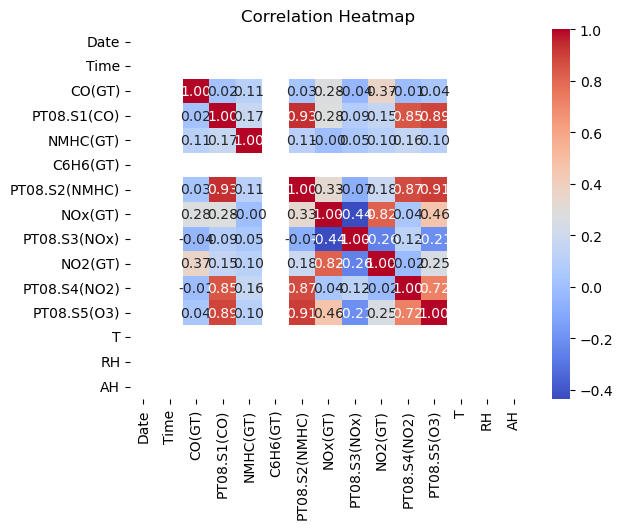

In [56]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


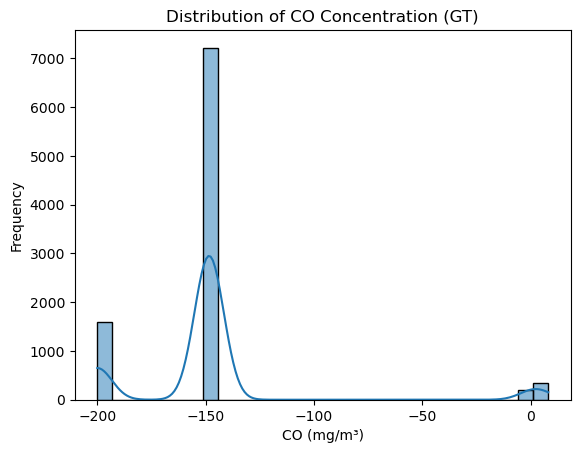

In [62]:
sns.histplot(data['CO(GT)'], kde=True, bins=30)
plt.title('Distribution of CO Concentration (GT)')
plt.xlabel('CO (mg/m³)')
plt.ylabel('Frequency')
plt.show()


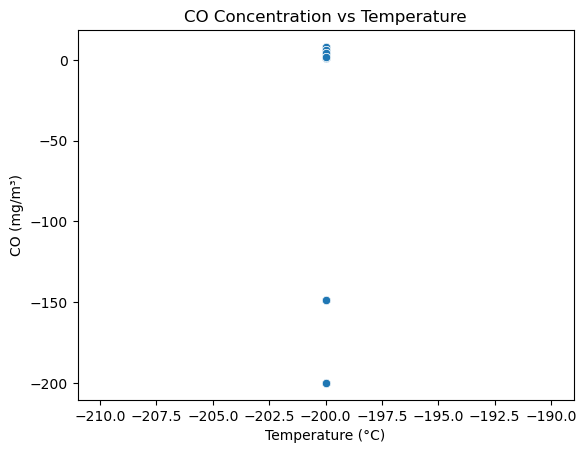

In [66]:
sns.scatterplot(x=data['T'], y=data['CO(GT)'])
plt.title('CO Concentration vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('CO (mg/m³)')
plt.show()

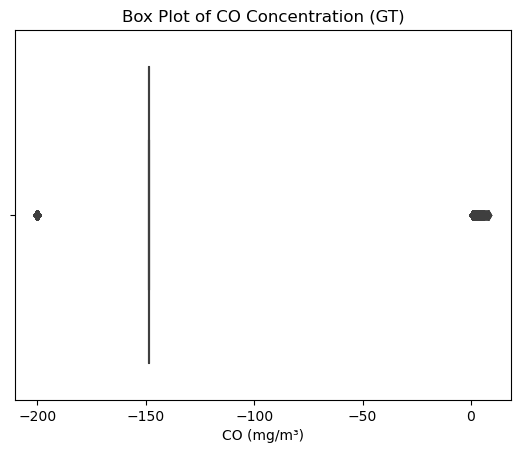

In [68]:
sns.boxplot(x=data['CO(GT)'])
plt.title('Box Plot of CO Concentration (GT)')
plt.xlabel('CO (mg/m³)')
plt.show()

In [70]:
# Save the cleaned dataset
data.to_csv('Cleaned_AirQualityUCI.csv', index=False)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [78]:
# Drop completely empty columns and rows
data = data.dropna(axis=1, how='all')
data = data.dropna(axis=0, how='all')

# Convert all numeric columns
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values with column means
data = data.fillna(data.mean())

# Drop non-numeric or irrelevant columns
data = data.drop(columns=['Date', 'Time'], errors='ignore') 

In [80]:
X = data.drop(columns=['CO(GT)'], errors='ignore') 
y = data['CO(GT)'] 

X = X.fillna(0)
y = y.fillna(0)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [88]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 2090.60292805832
R^2 Score: 0.646147567492568


In [90]:
import joblib

# Save the model
joblib.dump(model, 'air_quality_model.pkl')

['air_quality_model.pkl']

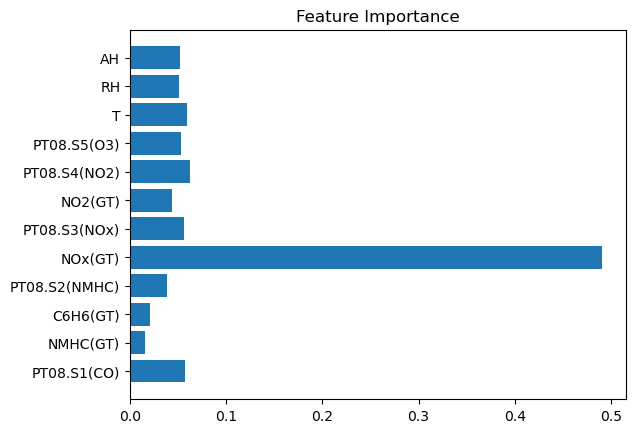

In [92]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importances)
plt.title('Feature Importance')
plt.show()

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples at a leaf node
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # Cross-validation folds
                           scoring='r2',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [98]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

# Evaluate
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R^2 Score:", r2_gb)


Gradient Boosting - Mean Squared Error: 2376.9492101168694
Gradient Boosting - R^2 Score: 0.5976810093116782


In [100]:
from sklearn.svm import SVR

# Train an SVR model
svr_model = SVR(kernel='rbf', C=1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Evaluate
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR - Mean Squared Error:", mse_svr)
print("SVR - R^2 Score:", r2_svr)


SVR - Mean Squared Error: 2892.8632646090646
SVR - R^2 Score: 0.5103581414936426


In [104]:
from sklearn.model_selection import cross_val_score
import numpy as np
# Cross-validation for Random Forest
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean R^2 Score:", np.mean(cv_scores))

Cross-Validation R^2 Scores: [ 0.61980083 -0.01492575  0.45380062  0.18762478 -0.12091443]
Mean R^2 Score: 0.2250772108891395


In [106]:
low_importance = feature_importances < 0.01  # Example threshold
X_reduced = X.loc[:, ~low_importance]

In [108]:
data['Temp_Humidity_Interaction'] = data['T'] * data['RH']

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize Neural Network
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output layer
])

# Compile and train the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 6282.5986 - mae: 37.7038 - val_loss: 3006.4329 - val_mae: 37.8550
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 3189.4324 - mae: 36.7771 - val_loss: 2694.9868 - val_mae: 29.3310
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 3101.8438 - mae: 31.6461 - val_loss: 2667.1934 - val_mae: 27.7860
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 3222.3044 - mae: 31.7111 - val_loss: 2666.8865 - val_mae: 27.2176
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 3031.3547 - mae: 29.9086 - val_loss: 2663.5967 - val_mae: 27.7503
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 3175.7522 - mae: 31.3297 - val_loss: 2636.6018 - val_mae: 26.9537
Epoch 7/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 3058.2263 - mae: 30.2907 - val_loss: 2635.2478 - val_mae: 26.9383
Epoch 8/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 2960.4114 - mae: 29.2709 - val_loss: 2626.7161 - val_

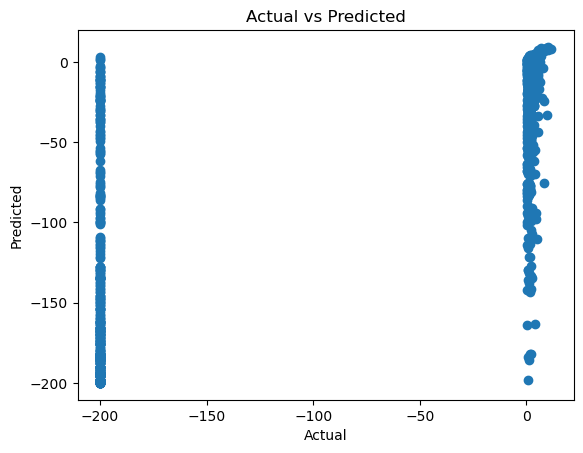

In [112]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

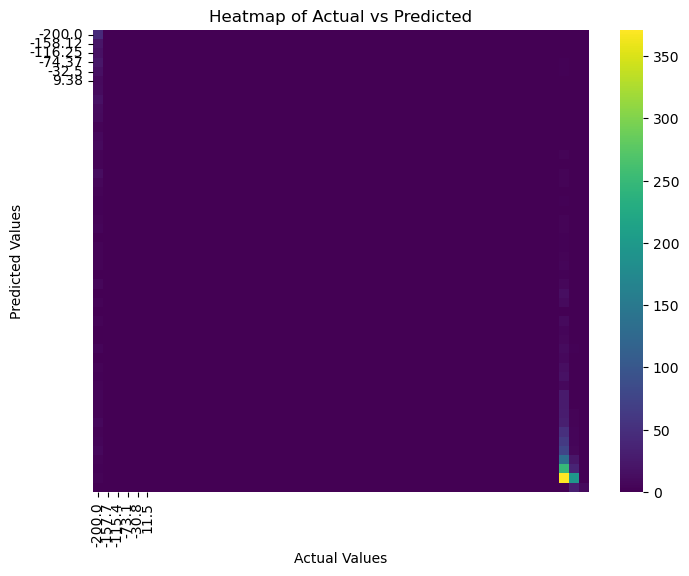

In [114]:
import numpy as np
import seaborn as sns

# Create a 2D histogram for actual vs predicted
heatmap_data, xedges, yedges = np.histogram2d(y_test, y_pred, bins=(50, 50))

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.T, cmap='viridis', cbar=True, xticklabels=np.round(xedges[::10], 2), yticklabels=np.round(yedges[::10], 2))
plt.title('Heatmap of Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [117]:
from scipy.stats import zscore
data = data[(np.abs(zscore(data)) < 3).all(axis=1)]  # Filter rows with z-scores above 3


In [119]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

selector = RFE(RandomForestRegressor(), n_features_to_select=10, step=1)
X_reduced = selector.fit_transform(X, y)


In [121]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                   param_distributions=param_grid,
                                   n_iter=50,  # Number of combinations to try
                                   cv=3,
                                   verbose=2,
                                   random_state=42)
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_dept

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

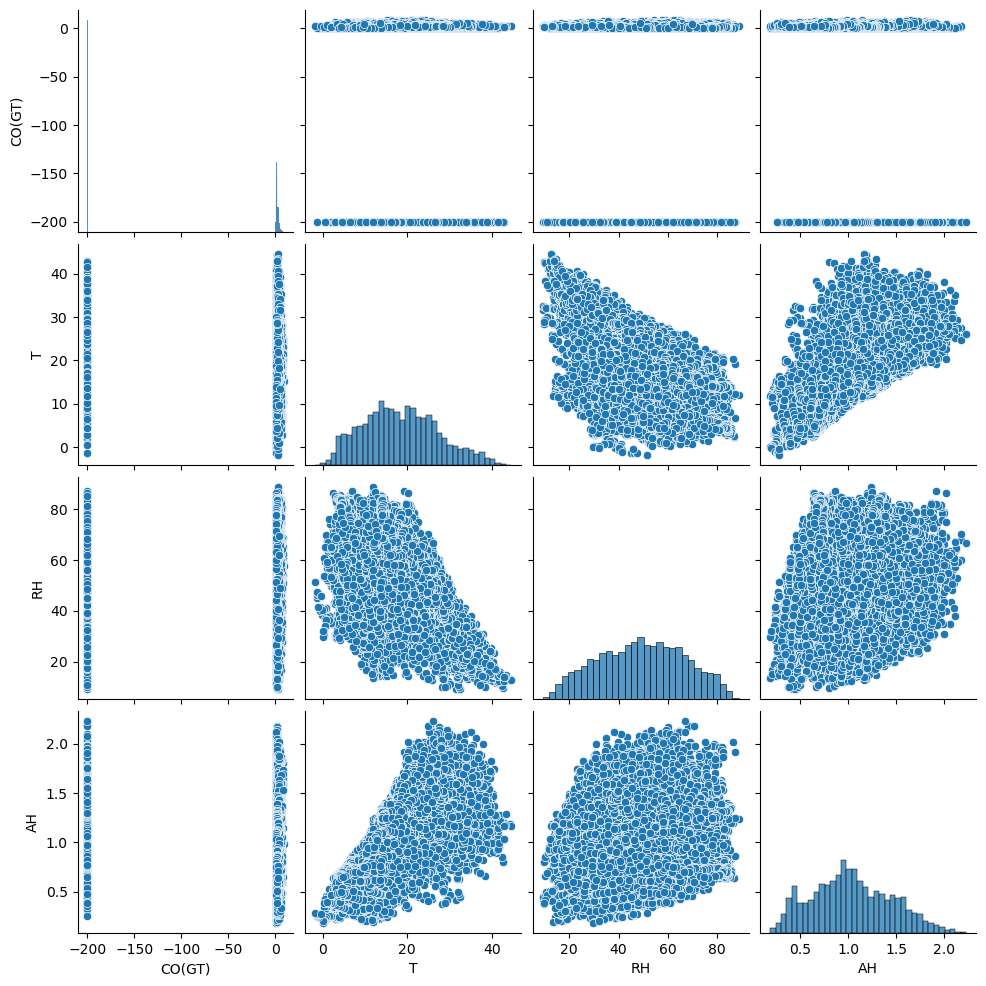

In [123]:
sns.pairplot(data[['CO(GT)', 'T', 'RH', 'AH']])
plt.show()


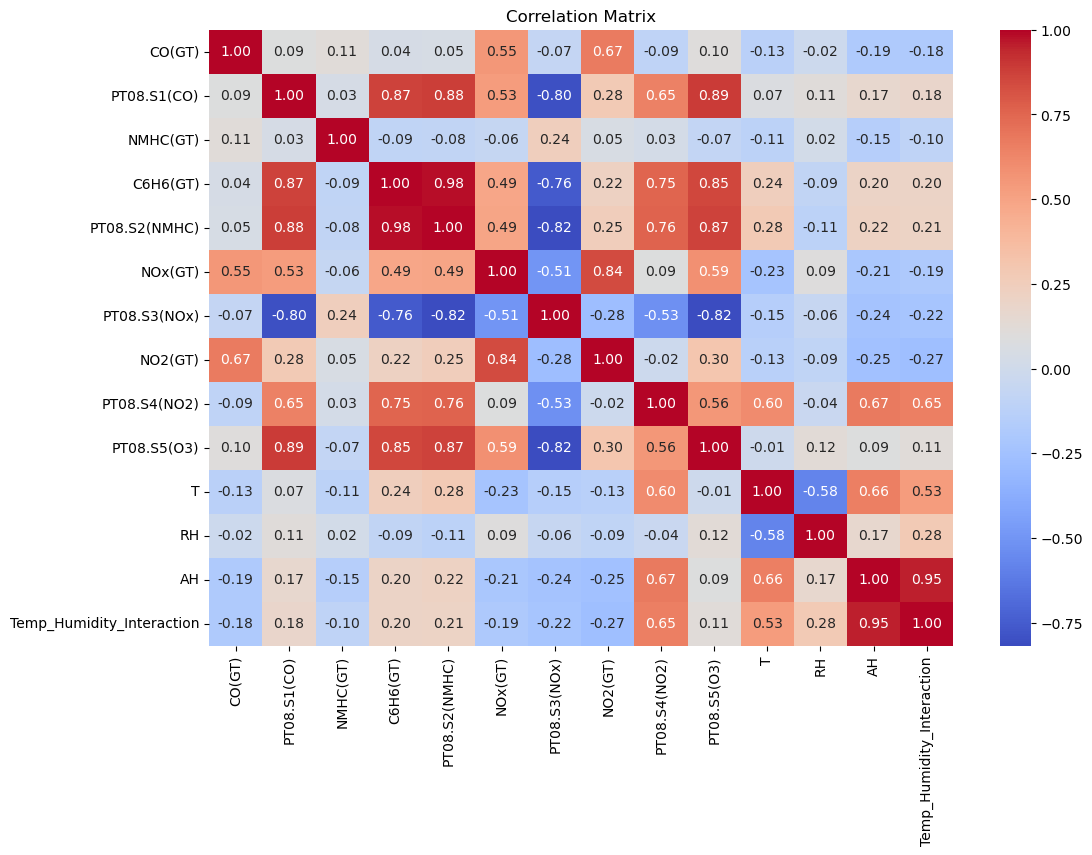

In [125]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
